# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1. Is the distribution of body temperatures normal?

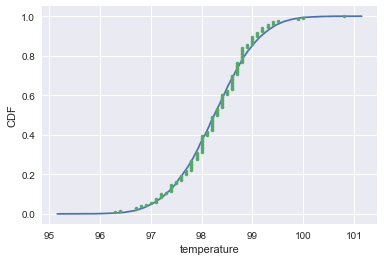

In [5]:
def ecdf(data): #Compute ECDF for one-dimensional array of elements 
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n 
    return x, y

sample_size = len(df.temperature)
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)

normal_dist = np.random.normal(sample_mean, size = 10000, scale = sample_std)

x_norm, y_norm = ecdf(normal_dist)
x_data, y_data = ecdf(df['temperature'])

sns.set()
q1 = plt.plot(x_norm, y_norm)
q2 = plt.plot(x_data, y_data, marker='.', linestyle= 'none')

#Label axes 
plt.xlabel('temperature')
plt.ylabel('CDF')

#Display the plot 
plt.show()

The distribution is somewhat like a normal distribution. 

2. Is the sample size large? Are the observations independent?

In [6]:
print('sample size:', sample_size)
print('sample mean:', sample_mean)
print('sample std:', sample_std )

sample size: 130
sample mean: 98.24923076923078
sample std: 0.7303577789050377


Typically if a sample has more than 30 observations, the sample is large. The sample size indicates there are 130 observations in the dataset, therefore the sample size is large. The observations are indpendent of one another because each variable measures the temperature of a different person, the variables are discrete. 

3. Is the true population mean really 98.6 degrees F?

We have to use a one-sample test because we are comparing the sample observation mean to the population mean. Because we don't know the standard deviation of the population, we use the t-test. 

H0: Average human body temperature is 98.6 degrees F. 


In [8]:
from statsmodels.stats.weightstats import ztest 
import scipy.stats as stats

#using a one-sample z-test
print(ztest(df.temperature, value=98.6))
print(stats.ttest_1samp(df.temperature, 98.6))

(-5.4548232923645195, 4.9021570141012155e-08)
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


The p-value is small thus we can reject the null hypothesis. 

4. Draw a small sample of size 10 from the data and repeat both tests.

In [14]:
#using a one sample z-test 
sample_10 = np.random.choice(df.temperature, size=10)

print(ztest(sample_10, value=98.6))
print(stats.ttest_1samp(sample_10, 98.6))

(-0.5419665026125632, 0.5878415821153193)
Ttest_1sampResult(statistic=-0.5419665026125632, pvalue=0.6010000523647019)


The t-test value should be used when the sample size is small (<30) and population variance is unknown. The p-value for the t-test is greater than the p-value from the z-test. The t-test does not reject the null hypothesis.  

5. At what temperature should we consider someone's temperature to be "abnormal"?

In [15]:
#calculating the 95% confidence interval 
zscore = 1.96 
sig = sample_std/np.sqrt(sample_size)
margin = abs(zscore*sig)

confidence_int = [sample_mean - margin, sample_mean + margin]
print('95% Confidence Interval:', confidence_int)

95% Confidence Interval: [98.12367980442819, 98.37478173403336]


Temperatures below 98.1 and higher than 98.4 degrees F can be considered abnormal. 

6. Is there a significant difference between males and females in normal temperature?

In [19]:
#separating body temperatures by gender 
m_temp = np.array(df.temperature[df.gender=='M'])
f_temp = np.array(df.temperature[df.gender=='F'])

stats.ttest_ind(m_temp, f_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

Using a two-sample t-test, we can conclude that a difference exists between males and females in normal temperature. 

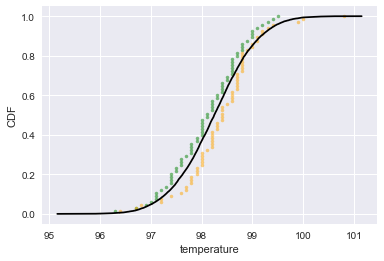

In [23]:
#plotting the ecdf 
male_x, male_y = ecdf(m_temp)
female_x, female_y = ecdf(f_temp)
x_norm, y_norm = ecdf(normal_dist)

sns.set()
q1 = plt.plot(male_x, male_y, marker='.', linestyle='none', color='green', alpha=.5)
q1 = plt.plot(female_x, female_y, marker='.', linestyle='none', color='orange', alpha=.5)
q1 = plt.plot(x_norm, y_norm, color = 'black')
plt.xlabel('temperature')
plt.ylabel('CDF')
plt.show()

From this we can conclude that the mean temperatures differ and there is also a difference between genders. 